In [ ]:
import pandas as pd 
import numpy as np
from nltk.stem import WordNetLemmatizer 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Recommedation System Across All Regions

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/CGAS_Project/indian_food.csv")
data = data.fillna("North")
data['ingredients']=data['ingredients'].str.lower()
data['state']=data['state'].str.lower()
data['name']=data['name'].str.lower()
data['region']=data['region'].str.lower()
data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,west bengal,east
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,rajasthan,west
2,gajar ka halwa,"carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,punjab,north
3,ghevar,"flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,rajasthan,west
4,gulab jamun,"milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,west bengal,east
...,...,...,...,...,...,...,...,...,...
250,til pitha,"glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,assam,north east
251,bebinca,"coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,goa,west
252,shufta,"cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,jammu & kashmir,north
253,mawa bati,"milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,madhya pradesh,central


In [ ]:
index_values = data[data['region']==-1].index
data.drop(index_values,inplace=True)

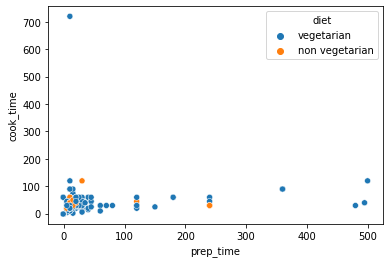

In [ ]:
sns.scatterplot(x="prep_time",y="cook_time",hue="diet",data=data)

In [ ]:
def generate_data(row):
    return row['diet'].lower()+ " " +row['ingredients'].lower()+ " " +row['course'].lower()+ " " +row['flavor_profile'].lower()
recommended= data.apply(generate_data,axis=1)
print(recommended)

0      vegetarian maida flour, yogurt, oil, sugar des...
1       vegetarian gram flour, ghee, sugar dessert sweet
2      vegetarian carrots, milk, sugar, ghee, cashews...
3      vegetarian flour, ghee, kewra, milk, clarified...
4      vegetarian milk powder, plain flour, baking po...
                             ...                        
250    vegetarian glutinous rice, black sesame seeds,...
251    vegetarian coconut milk, egg yolks, clarified ...
252    vegetarian cottage cheese, dry dates, dried ro...
253    vegetarian milk powder, dry fruits, arrowroot ...
254    vegetarian brown rice, fennel seeds, grated co...
Length: 255, dtype: object


Genearte Vectorizer

There are about 5 blocks of high cosine similarity near the diagonal elements.

(255, 345)


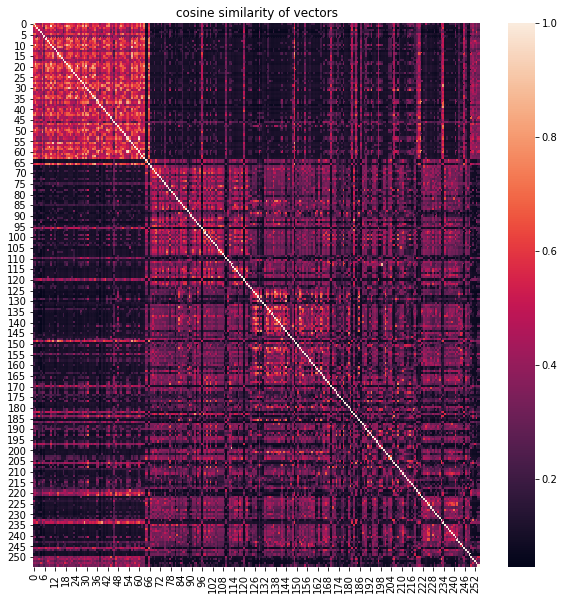

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
def findSimilarity(data):
  vectorizer = CountVectorizer()
  X = vectorizer.fit_transform(data)
  X = X.toarray()
  similarity = cosine_similarity(X)
  print(X.shape)
  plt.figure(figsize=(10, 10))
  ax = sns.heatmap(similarity)
  ax.set_title("cosine similarity of vectors")
  return similarity
similarity = findSimilarity(recommended)

In [ ]:
def show():
  idx=1
  recipe_names=[]
  for i in range(len(data['name'])):
    temp = str(idx)+"."+ " " +data.iloc[i]['name']
    recipe_names.append(temp)
    idx = idx+1
  print("All the available Dishes: \n")
  return recipe_names
recipe_names = show()
val = "\n".join(recipe_names)
print(val)

All the available Dishes: 

1. balu shahi
2. boondi
3. gajar ka halwa
4. ghevar
5. gulab jamun
6. imarti
7. jalebi
8. kaju katli
9. kalakand
10. kheer
11. laddu
12. lassi
13. nankhatai
14. petha
15. phirni
16. rabri
17. sheera
18. singori
19. sohan halwa
20. sohan papdi
21. chhena jalebi
22. chhena kheeri
23. chhena poda
24. cham cham
25. kheer sagar
26. ledikeni
27. lyangcha
28. malapua
29. mihidana
30. misti doi
31. pantua
32. pithe
33. rasabali
34. ras malai
35. rasgulla
36. sandesh
37. adhirasam
38. ariselu
39. bandar laddu
40. chikki
41. dharwad pedha
42. double ka meetha
43. gavvalu
44. kakinada khaja
45. kuzhi paniyaram
46. mysore pak
47. obbattu holige
48. palathalikalu
49. poornalu
50. pongal
51. pootharekulu
52. qubani ka meetha
53. sheer korma
54. unni appam
55. kajjikaya
56. anarsa
57. basundi
58. dhondas
59. doodhpak
60. mahim halwa
61. modak
62. shankarpali
63. shrikhand
64. sutar feni
65. maach jhol
66. pork bharta
67. chak hao kheer
68. galho
69. aloo gobi
70. aloo tikk

In [ ]:
food = input("Enter the name of the liked dish: ")
food = str(food.lower())
def recommendedSystem(food,similarity):
  try:
    food_idx = data[data.name==food].index.values[0]
    sim_val = list(enumerate(similarity[food_idx]))
    scores = sorted(sim_val,key=lambda x:x[1], reverse=True)
    print("\nTop 5 Recommended Dishes are")
    s=0
    num=1
    for i in range(1,len(scores)):
      j = scores[i][0]
      if s<5:
        print("\n"+str(num)+ "." + " " +data[data.index==j]['name'].values[0].upper()+ " " +data[data.index==j]['state'].values[0].upper()+ " " +data[data.index==j]['region'].values[0].upper()+"\n")
      s = s+1
      num = num+1
  except:
    print("No food Item of this name")
    exit(1)
recommendedSystem(food,similarity)

Enter the name of the liked dish: Gulab jamun

Top 5 Recommended Dishes are

1. MAWA BATI MADHYA PRADESH CENTRAL


2. SOHAN PAPDI MAHARASHTRA WEST


3. MYSORE PAK KARNATAKA SOUTH


4. DHARWAD PEDHA KARNATAKA SOUTH


5. CHHENA KHEERI ODISHA EAST



# **Recommendation System Region Wise**

In [ ]:
def generate_dataRegionWise(row):
    return row['diet'].lower()+ " " +row['ingredients'].lower()+ " " +row['course'].lower()+ " " +row['flavor_profile'].lower()+" "+row['state']+ " " +row['region'].lower()
recommendedRegion= data.apply(generate_dataRegionWise,axis=1)
print(recommendedRegion)

0      vegetarian maida flour, yogurt, oil, sugar des...
1      vegetarian gram flour, ghee, sugar dessert swe...
2      vegetarian carrots, milk, sugar, ghee, cashews...
3      vegetarian flour, ghee, kewra, milk, clarified...
4      vegetarian milk powder, plain flour, baking po...
                             ...                        
250    vegetarian glutinous rice, black sesame seeds,...
251    vegetarian coconut milk, egg yolks, clarified ...
252    vegetarian cottage cheese, dry dates, dried ro...
253    vegetarian milk powder, dry fruits, arrowroot ...
254    vegetarian brown rice, fennel seeds, grated co...
Length: 255, dtype: object


(255, 378)


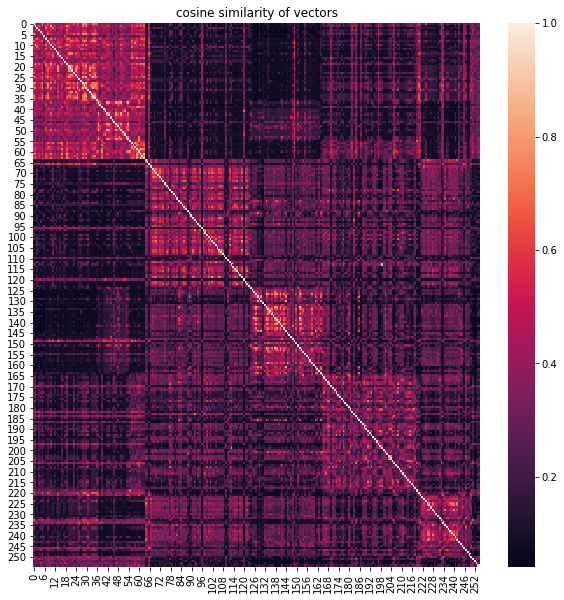

In [ ]:
similarity2 = findSimilarity(recommendedRegion)

In [ ]:
f = input("Enter name of the dish: ")
f = str(f.lower())
recommendedSystem(f,similarity2)

Enter name of the dish: Gulab jamun

Top 5 Recommended Dishes are

1. KALAKAND WEST BENGAL EAST


2. SANDESH WEST BENGAL EAST


3. MIHIDANA WEST BENGAL EAST


4. PANTUA WEST BENGAL EAST


5. MISTI DOI WEST BENGAL EAST

